In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pg import DB
import configparser
import warnings
warnings.simplefilter('error',RuntimeWarning)
from scoot_utilities import *
from IPython.display import HTML, display
import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
CONFIG = configparser.ConfigParser()
CONFIG.read('db.cfg')
dbset = CONFIG['DBSETTINGS']
db = DB(dbname=dbset['database'],host=dbset['host'],user=dbset['user'],passwd=dbset['password'])

In [15]:
centrelines = [3304786,446523,30018925,30018925,1147201,1147201,1147026,1147466,8540609,8571185,11466484,1141946]
dir_bins = [1,-1,1,-1,1,-1,1,1,1,-1,1,-1]
sdetectors = [['\'N12921J1\'','\'N12921J2\''],['\'N12931A1\'','\'N12931A2\''],['\'N12821C1\'','\'N12821C2\'','\'N12821C3\''],['\'N12851G1\'','\'N12851G2\''],['\'N30431K1\'','\'N30431K2\''],['\'N30421B1\'','\'N30421B2\''],['\'N30611K1\'','\'N30611K2\''],['\'N30311D1\'','\'N30311D2\''],['\'N21521K1\''],['\'N21521H1\''],['\'N21421D1\''],['\'N21311B1\'']]
locations = ['Don Mills NB N of Overlea','Don Mills SB S of Gateway','Don Mills NB N of Clock Tower','Don Mills SB S of Lawrence','Lake Shore EB E of Stadium','Lake Shore WB W of Bathurst','Lake Shore EB E of Spadina','Lake Shore EB E of Ontario Place','Bloor EB W of Castle Frank','Bloor WB E of Castle Frank','Bloor EB E of Church','Bloor WB W of Church']
aggregation = [[['lane1','lane2'],['lane3']],
               [['lane1','lane2'],['lane3']],
               [['lane1'],['lane2'],['lane3']],
               [['lane2','lane3'],['lane1']],
               [['lane1','lane2'],['lane3']],
               [['lane3'],['lane1','lane2']],
               [['lane1'],['lane2','lane3']],
               [['lane1'],['lane2','lane3']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']],
               [['lane1','lane2']]]
det_lane = {'N12921J1':2,'N12921J2':1,'N12931A1':2,'N12931A2':1,'N12821C1':1,'N12821C2':1,'N12821C3':1,
                 'N12851G1':2,'N12851G2':1,'N30431K1':2,'N30431K2':1,'N30421B1':1,'N30421B2':2,'N30611K1':1,
                 'N30611K2':2,'N30311D1':1,'N30311D2':2,'N21521K1':2,'N21521H1':2,'N21421D1':2,'N21311B1':2}

In [16]:
scoot_disagg = pd.DataFrame(db.query('SELECT * FROM scoot.cycle_level_170419 WHERE detector IN (' + ','.join([y for x in sdetectors for y in x ]) + ')').getresult(), \
                            columns = ['count_date','count_time','detector','CycleTime','Volume','occupancy','seconds'])
video = pd.DataFrame(db.query('SELECT * FROM scoot.video_counts').getresult(), \
                     columns = ['time_start','time_end','lane1','lane2','lane3','Volume','centreline_id','dir_bin','count_date','seconds'])
video['CycleTime'] = 20
scoot_agg = pd.DataFrame(db.query('SELECT detector, start_time, flow_mean, EXTRACT(HOUR FROM start_time)*3600 + EXTRACT(MINUTE FROM start_time)*60 AS seconds  FROM scoot.agg_15_201704 WHERE start_time::date = \'2017-04-19\' AND detector IN (' + ','.join([y for x in sdetectors for y in x ]) + ')').getresult(), \
                         columns = ['detector', 'count_time', 'Volume', 'seconds'])
scoot_agg['Volume'] = scoot_agg['Volume']//4

In [17]:
start_hour = 0
start_min = 15
start_sec = 0
end_hour = 23
end_min = 59
end_sec = 59

offsets = [0,0,0,0,0,0,0,0,0,0,0,0]

bin_sec = 900

start_time_sec = start_hour * 3600 + start_min * 60 + start_sec
end_time_sec = end_hour * 3600 + end_min * 60 + end_sec
num_bins = (end_time_sec - start_time_sec)//bin_sec
min_bins_start_15 = list(np.linspace(start_time_sec, start_time_sec+bin_sec*num_bins, num_bins+1))
bins = [x//bin_sec for x in min_bins_start_15]
bins = bins[:-1]

Don Mills NB N of Overlea


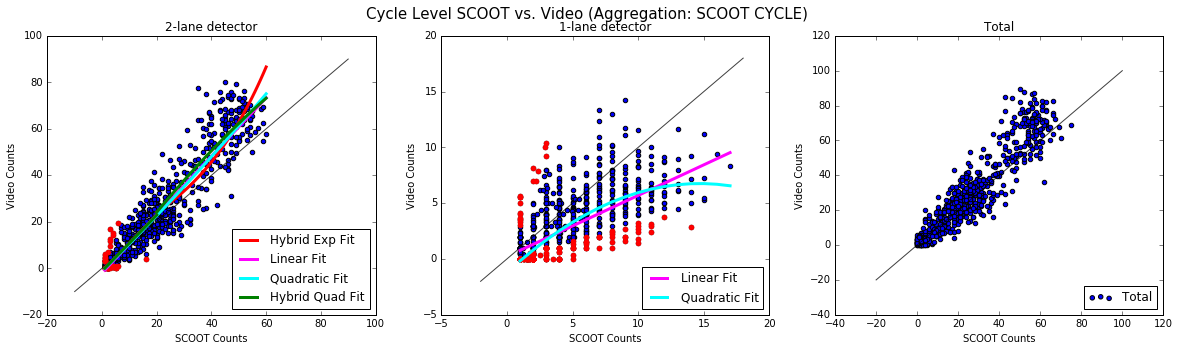

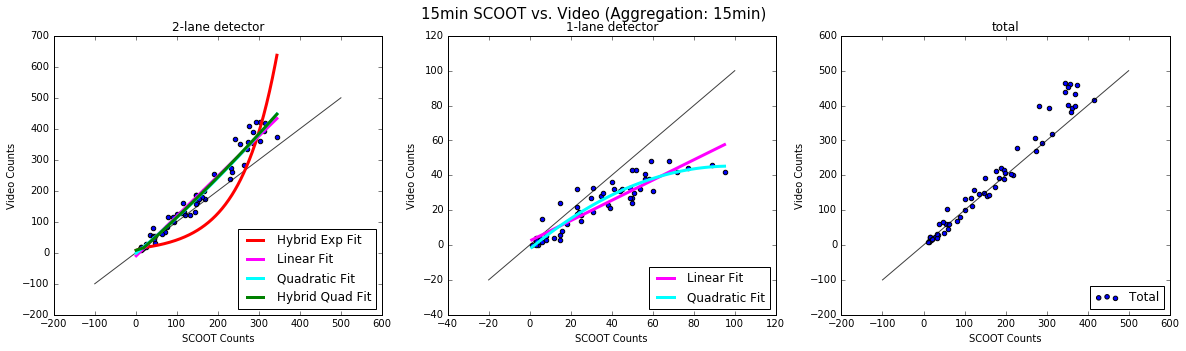

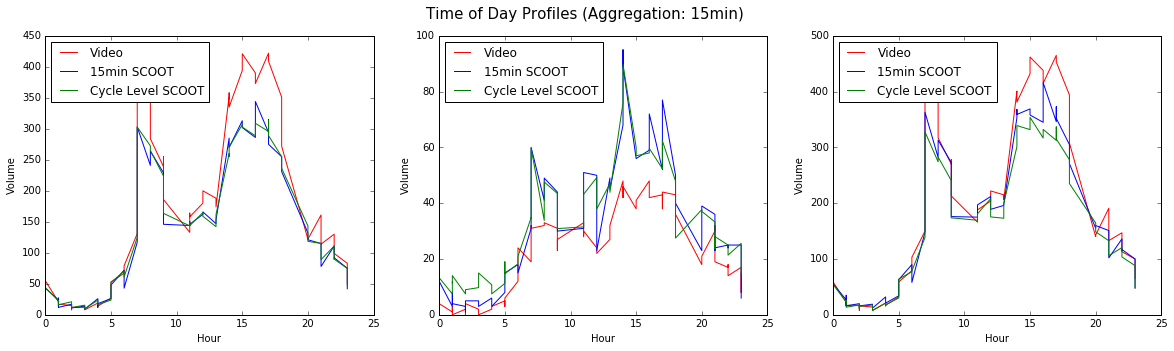

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      3768.12  3636.97    3619.00       3622.99
                aggregate         3456.09  1089.39    1030.11       1027.23
1-lane detector disaggregate          NaN  1152.34    1109.41           NaN
                aggregate             NaN   290.95     230.75           NaN



Don Mills SB S of Gateway


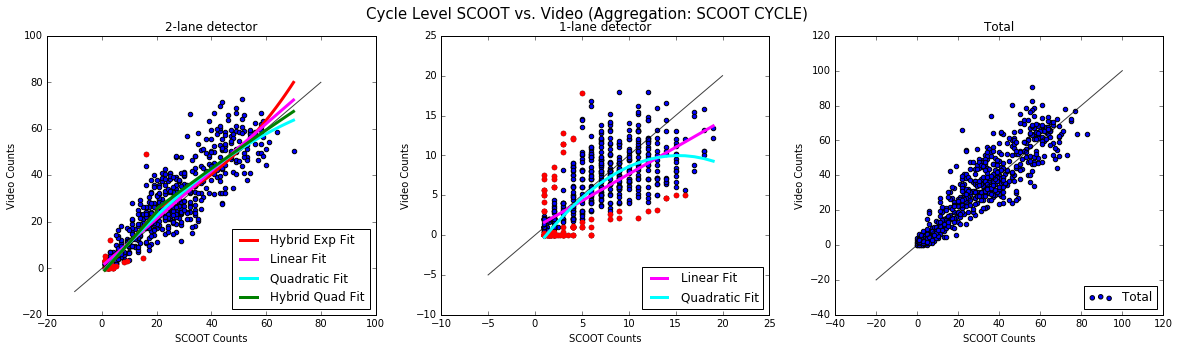

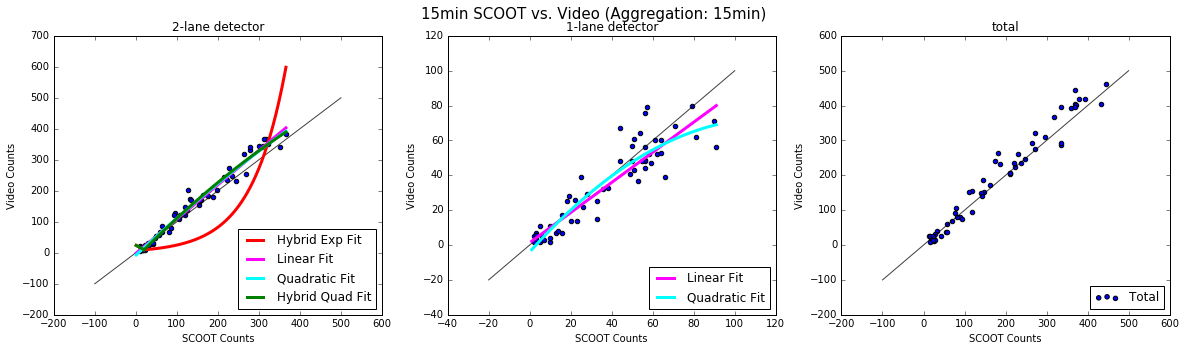

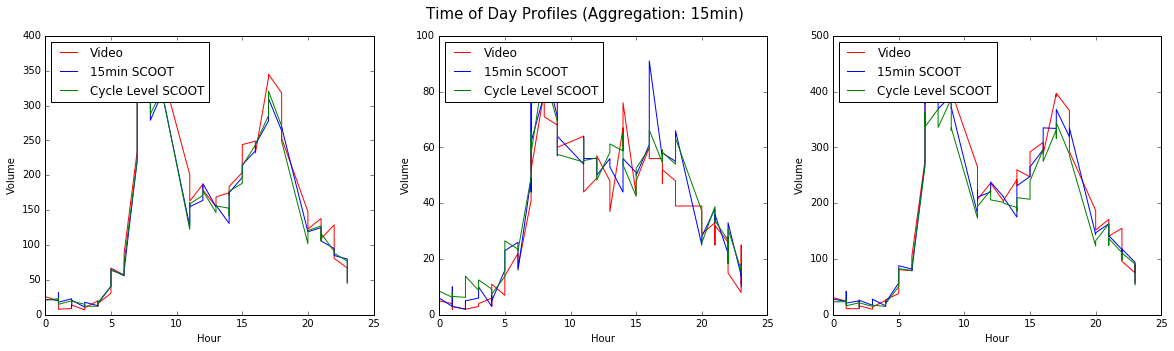

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      3398.20  3459.00    3365.64       3389.69
                aggregate         4339.68   817.25     811.50        805.24
1-lane detector disaggregate          NaN  1496.21    1379.67           NaN
                aggregate             NaN   417.93     416.85           NaN



Don Mills NB N of Clock Tower


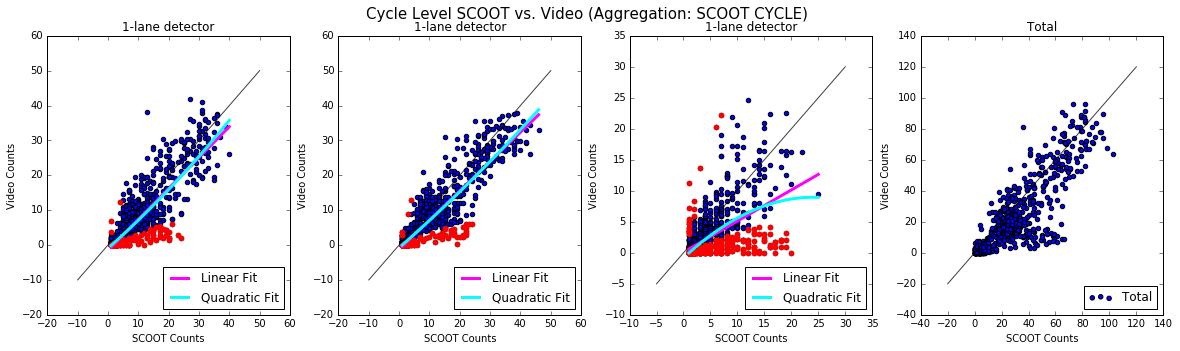

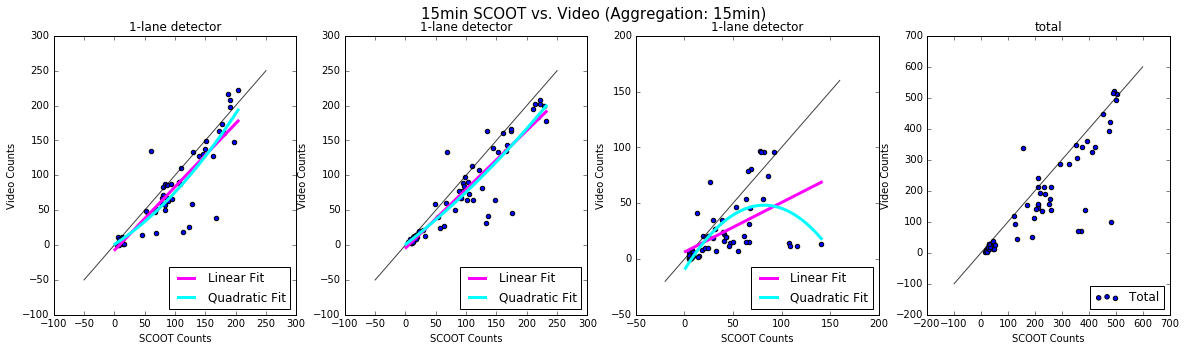

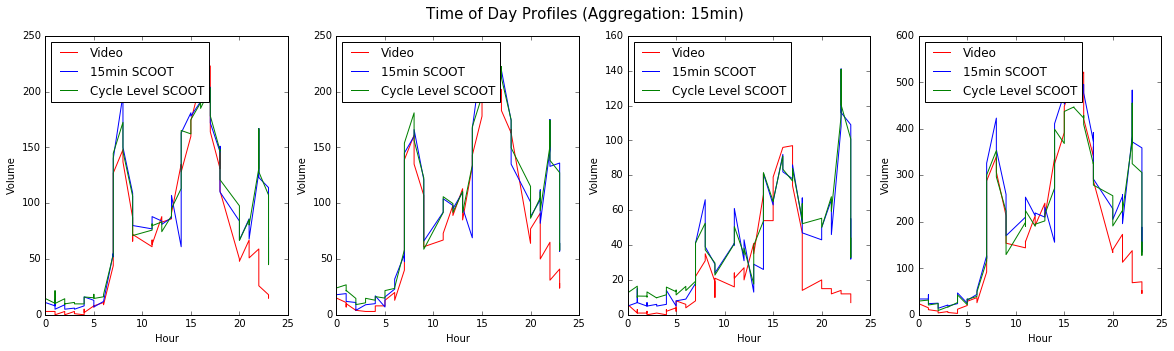

Sum of Absolute Error:
                             Lin hyd Exp   Linear  Quadratic Lin hyd Quad
Detector        Source                                                   
1-lane detector disaggregate        None  2538.29    2562.59         None
                aggregate           None  1003.28     987.32         None
                disaggregate        None  2354.65    2361.98         None
                aggregate           None   988.26     976.68         None
                disaggregate        None  1836.09    1817.68         None
                aggregate           None  1013.50     875.19         None



Don Mills SB S of Lawrence


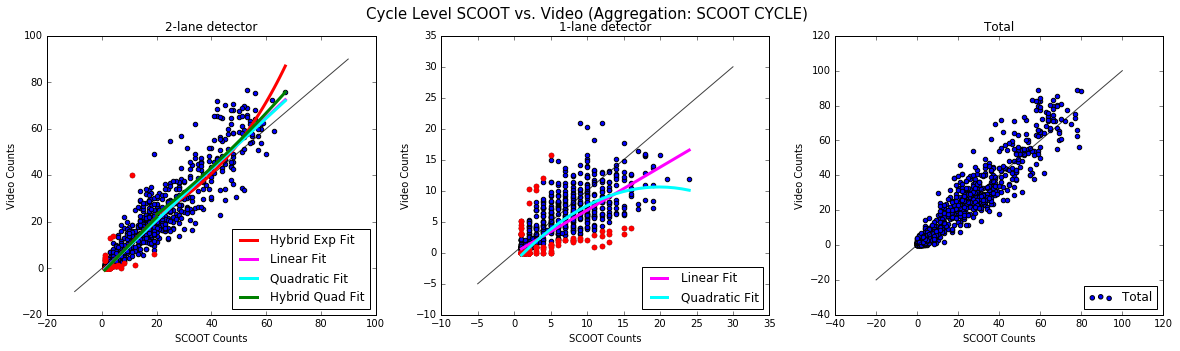

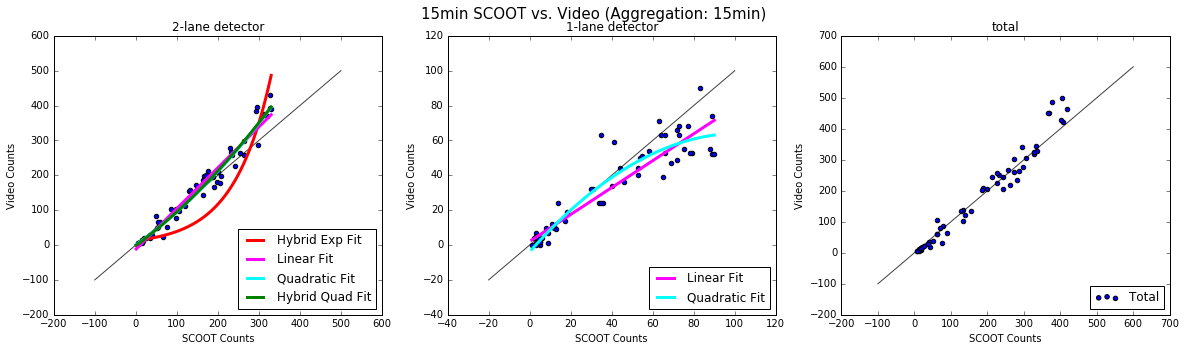

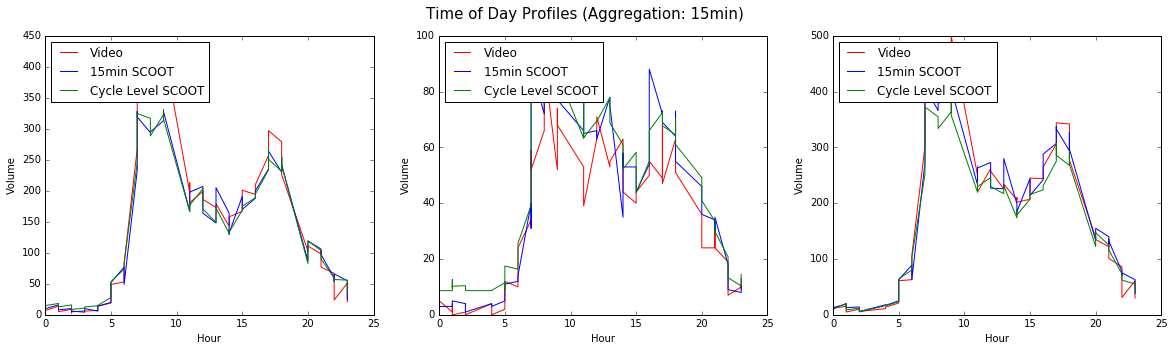

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      3501.49  3426.42    3423.92       3457.10
                aggregate         2817.26  1077.80     932.70        926.67
1-lane detector disaggregate          NaN  1582.01    1490.04           NaN
                aggregate             NaN   402.37     367.16           NaN



Lake Shore EB E of Stadium


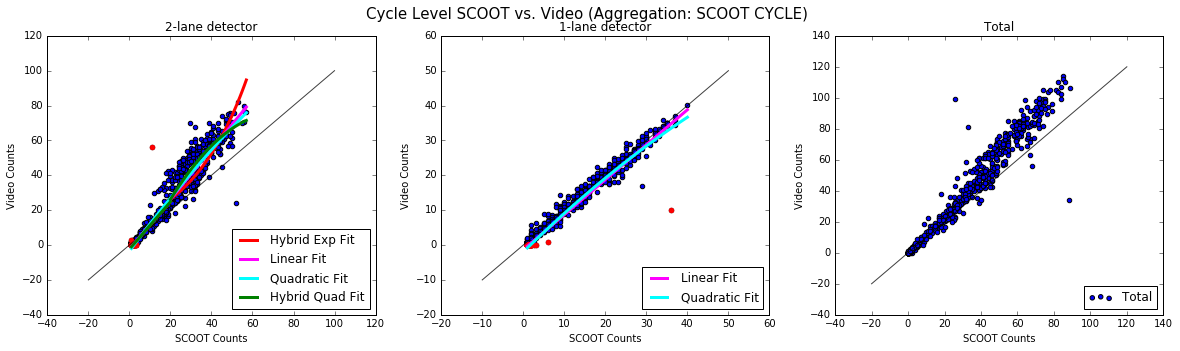

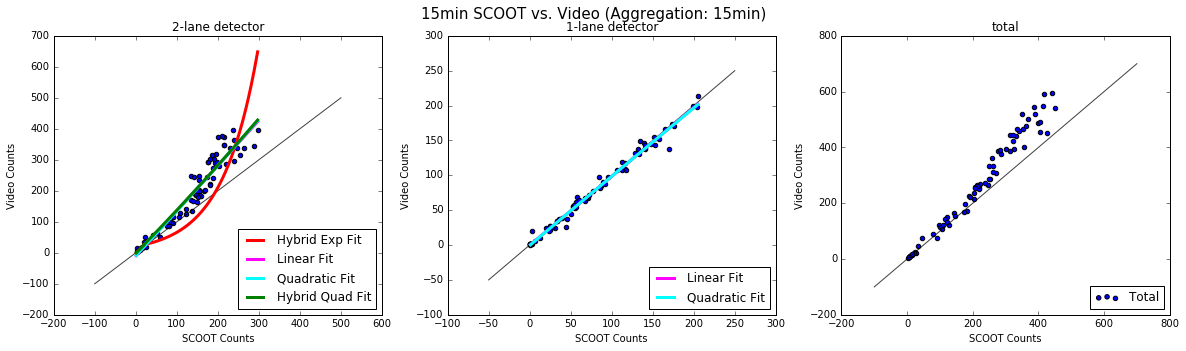

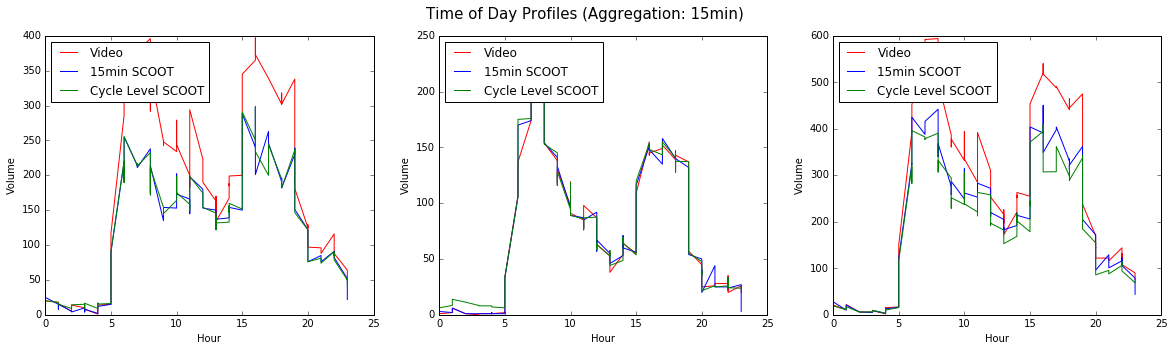

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      2898.87  2680.98    2755.32       2576.01
                aggregate         5049.67  2051.74    2030.90       2012.89
1-lane detector disaggregate          NaN   636.37     600.28           NaN
                aggregate             NaN   315.51     313.05           NaN



Lake Shore WB W of Bathurst


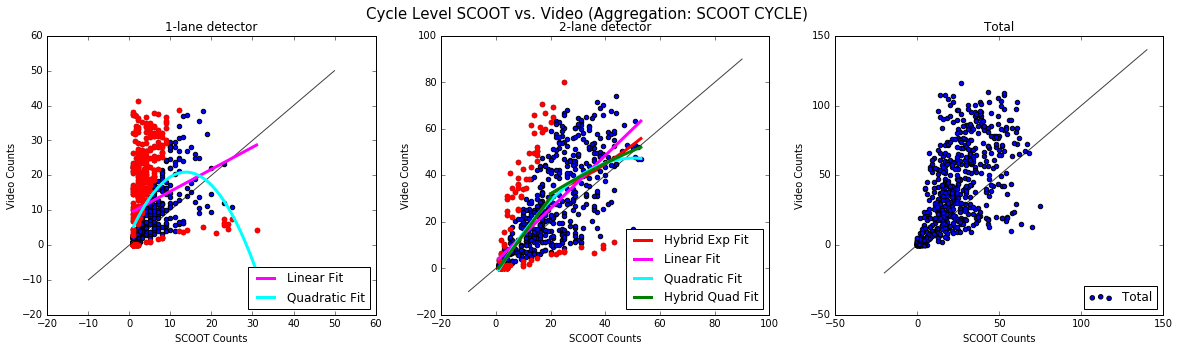

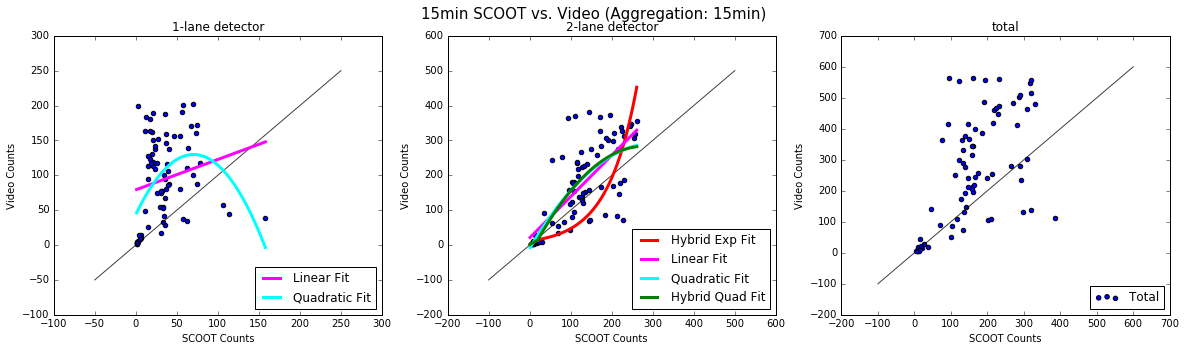

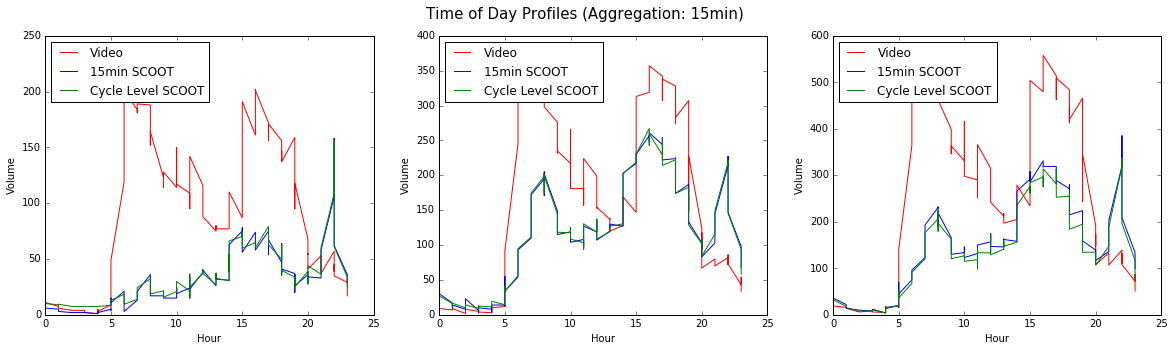

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
1-lane detector disaggregate          NaN  5869.19    5443.13           NaN
                aggregate             NaN  4056.51    3702.76           NaN
2-lane detector disaggregate      6718.57  7135.71    6663.85       6704.82
                aggregate         7216.89  5060.51    4890.81       4808.85



Lake Shore EB E of Spadina


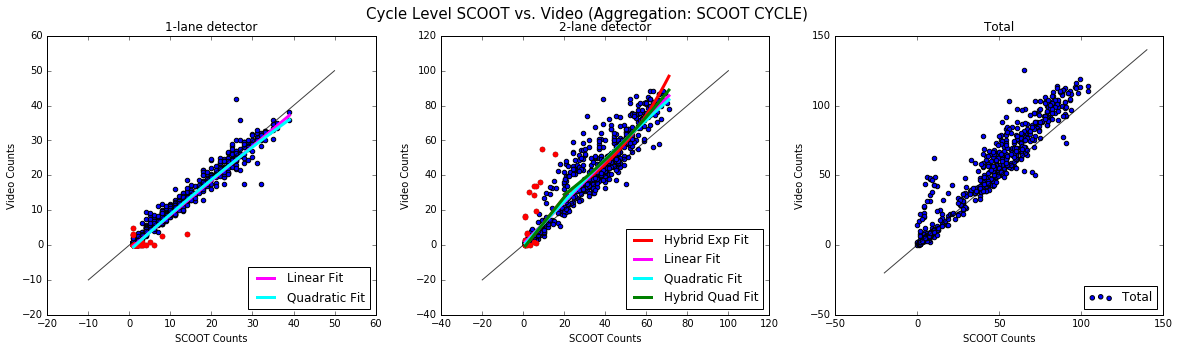

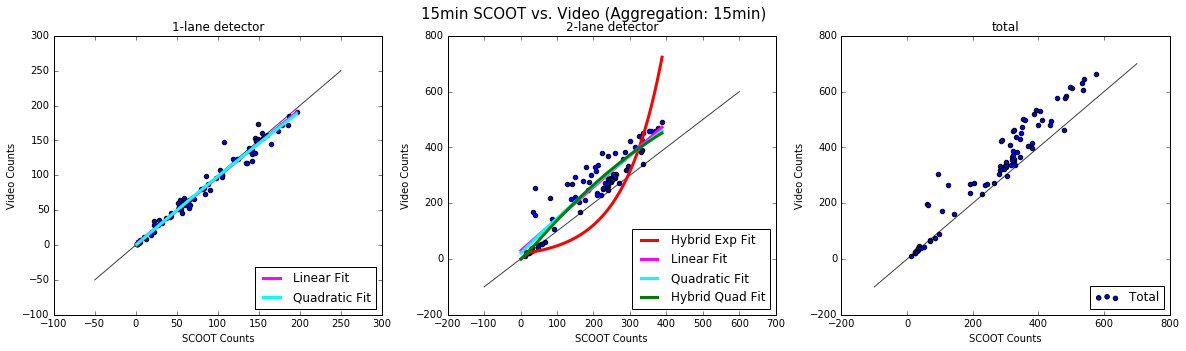

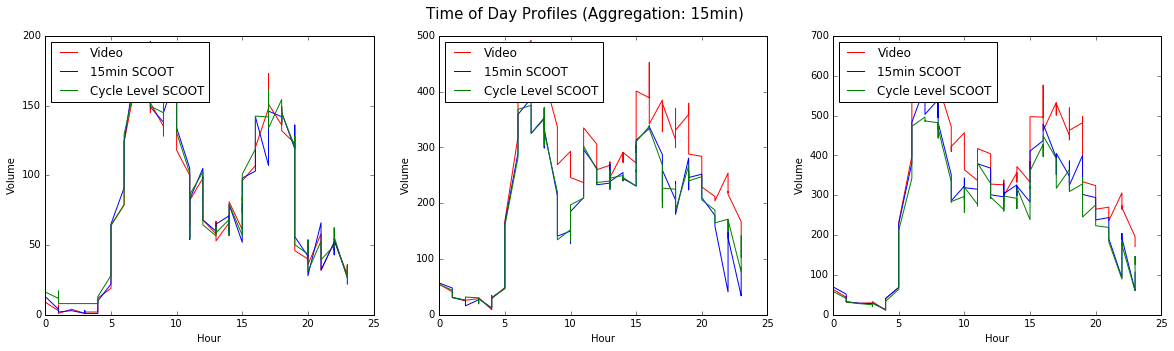

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
1-lane detector disaggregate          NaN   779.44     766.19           NaN
                aggregate             NaN   441.64     439.19           NaN
2-lane detector disaggregate      3629.81  3877.82    3870.33       3692.54
                aggregate         7805.88  3341.82    3357.63       3166.73



Lake Shore EB E of Ontario Place


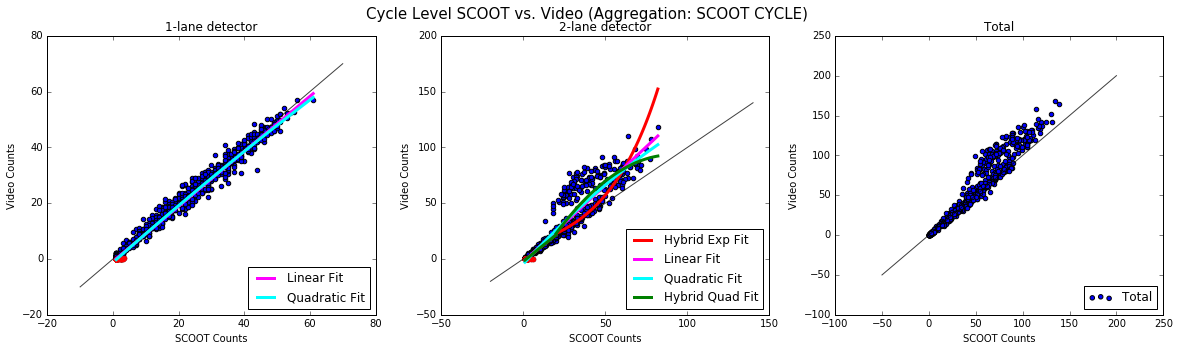

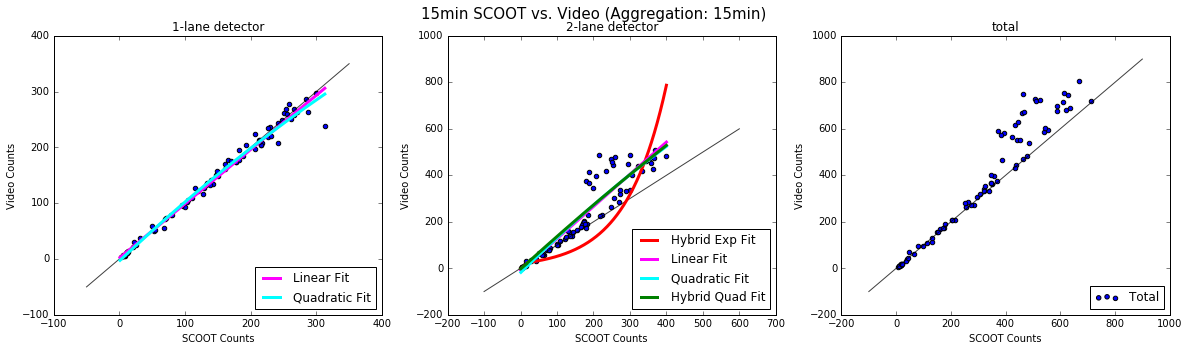

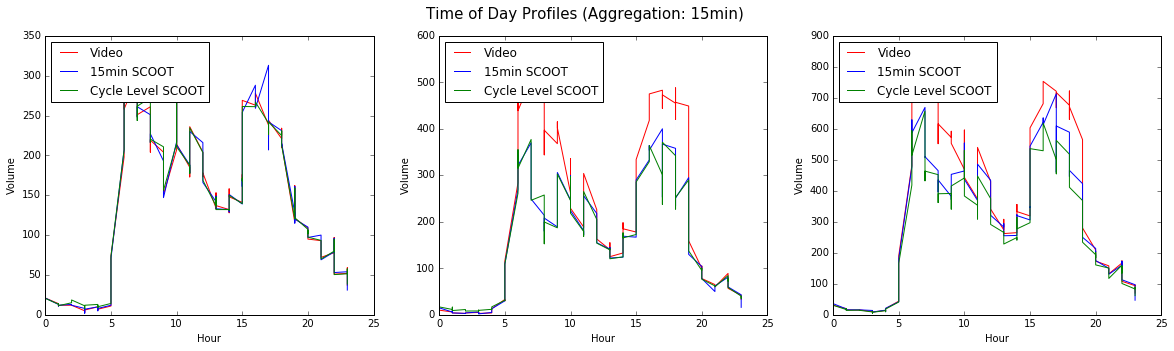

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
1-lane detector disaggregate          NaN   995.58     984.70           NaN
                aggregate             NaN   559.52     562.57           NaN
2-lane detector disaggregate      4382.85  4287.45    4484.21       4031.42
                aggregate         6753.42  3370.60    3531.50       3435.33



Bloor EB W of Castle Frank


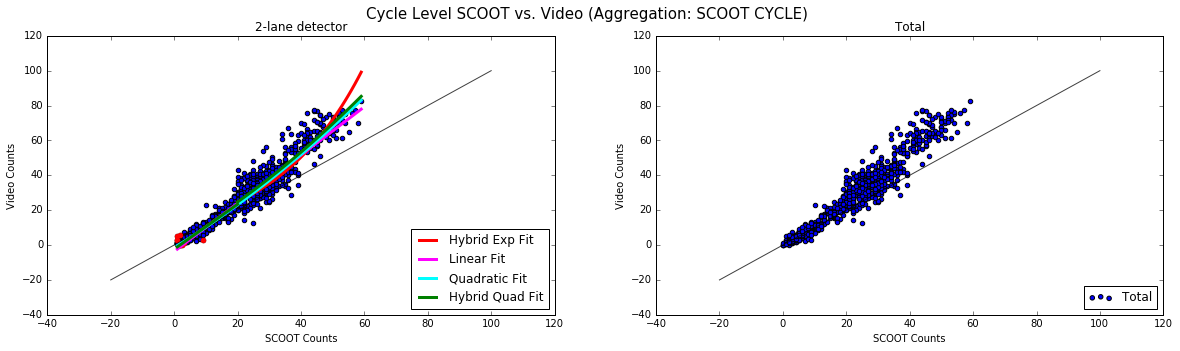

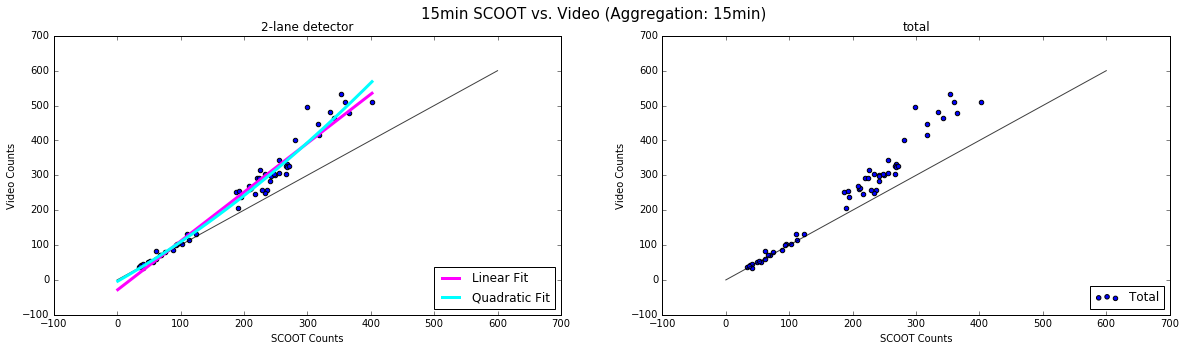

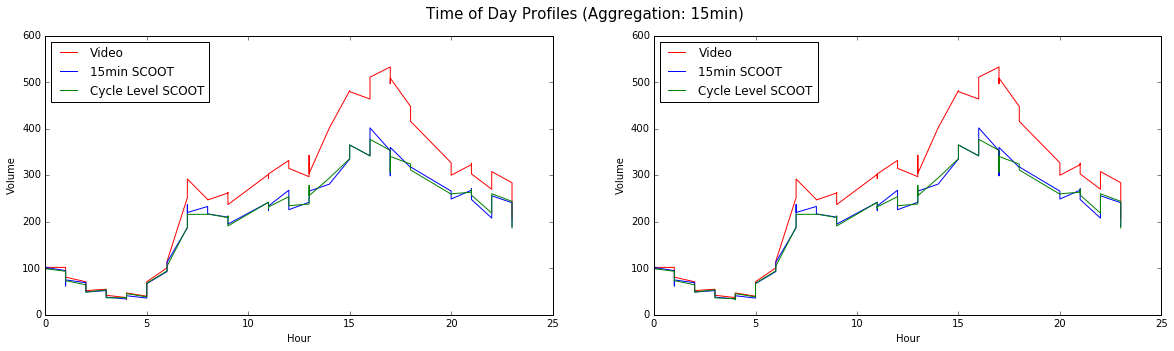

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      3362.19  3310.05    3127.98       3152.93
                aggregate             NaN  1094.69     968.12           NaN



Bloor WB E of Castle Frank


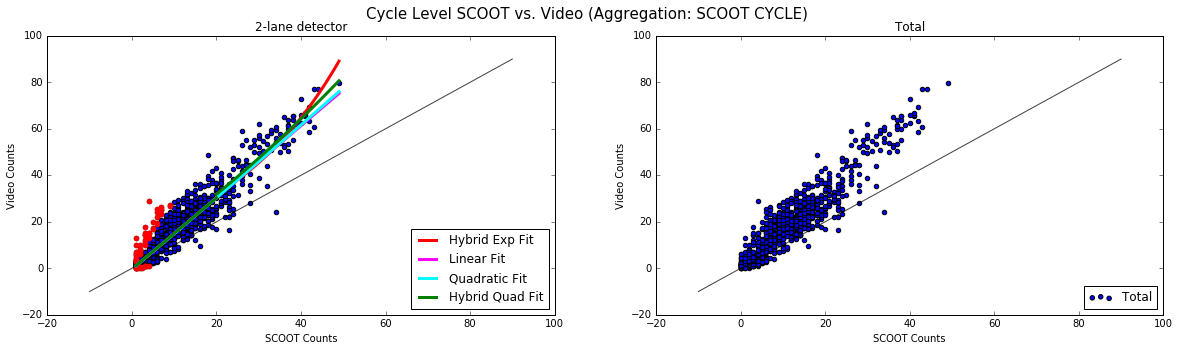

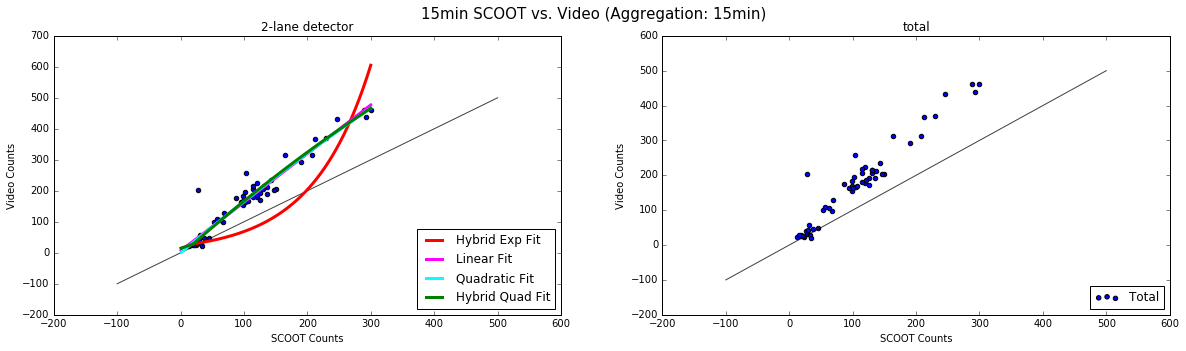

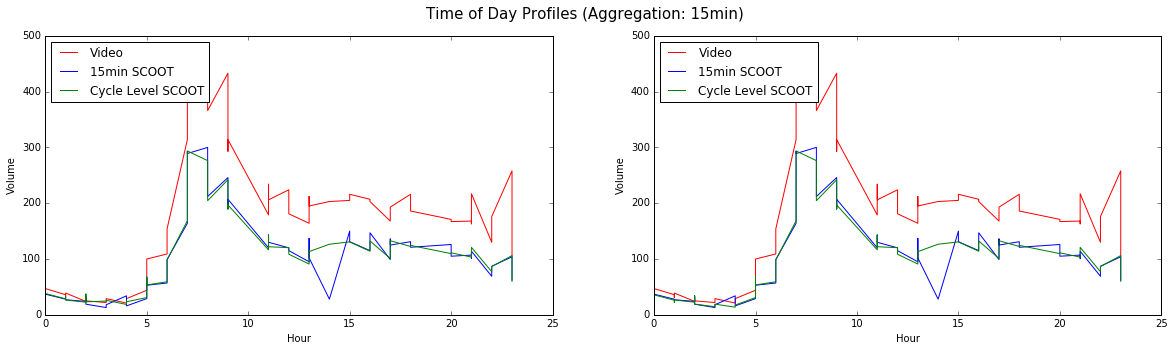

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate       3533.1  3502.04    3508.20       3503.61
                aggregate          4487.9  1139.82    1105.82       1070.81



Bloor EB E of Church


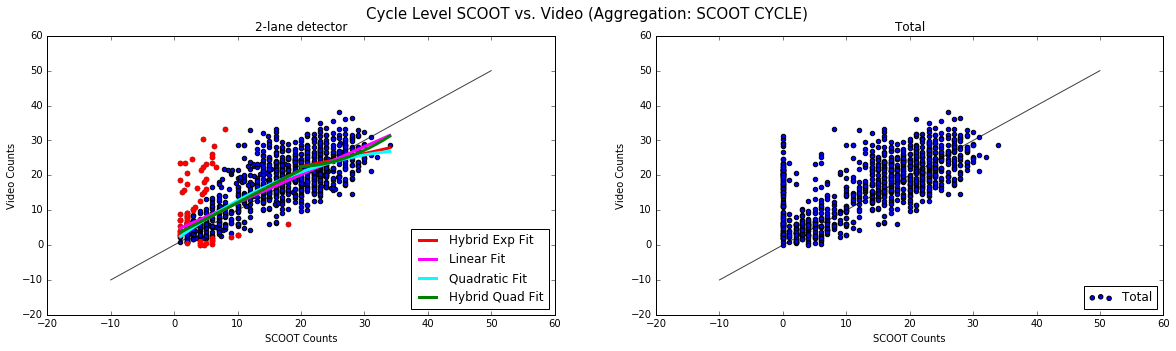

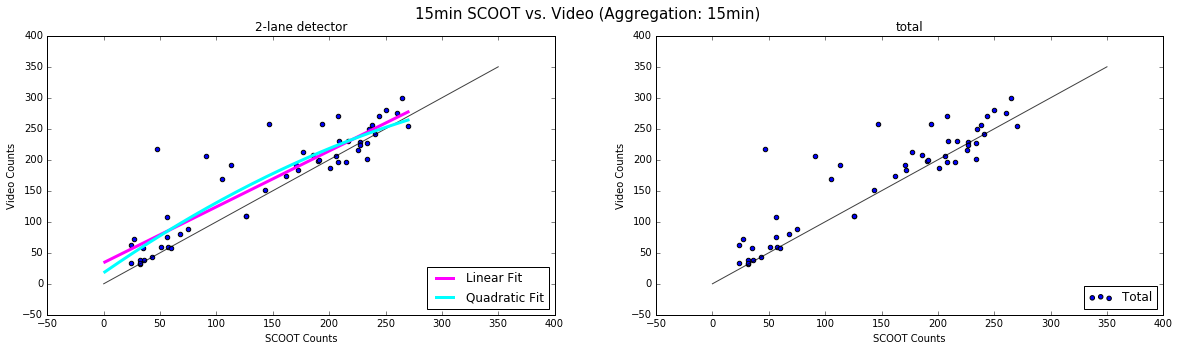

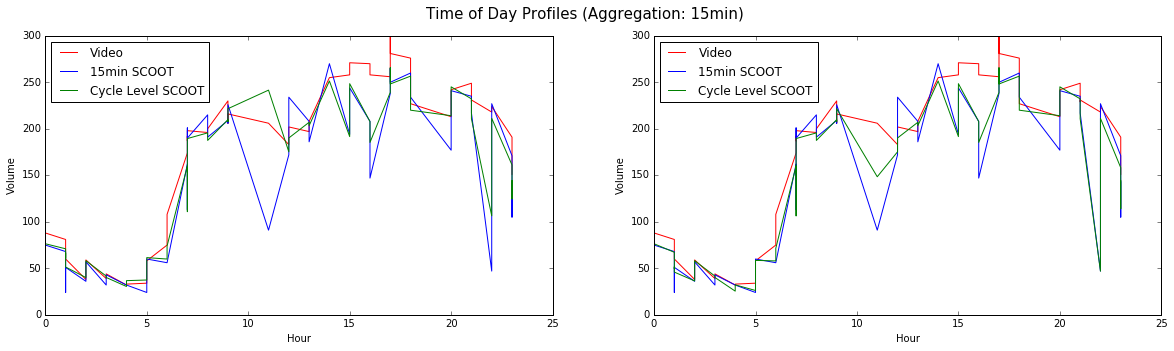

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      4170.27  4257.28    4136.91       4161.89
                aggregate             NaN  1328.14    1339.91           NaN



Bloor WB W of Church


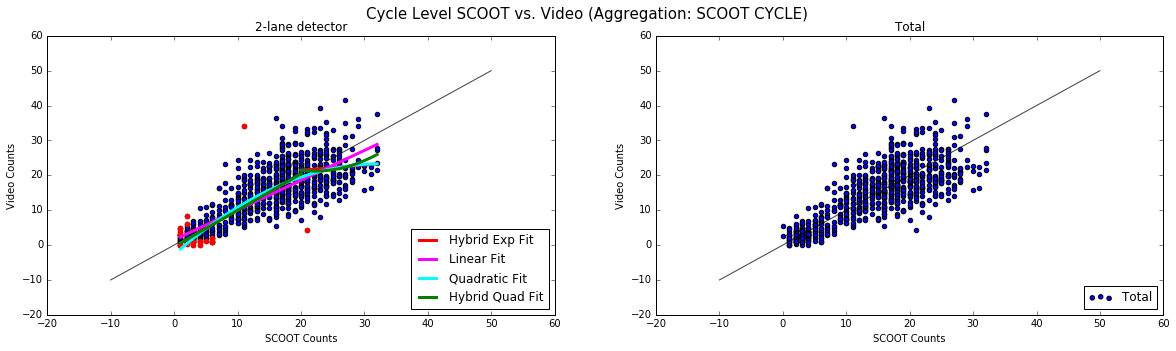

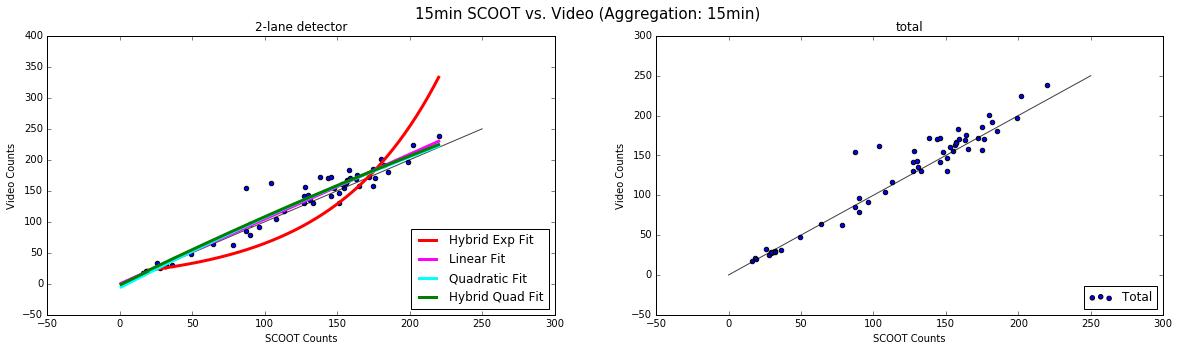

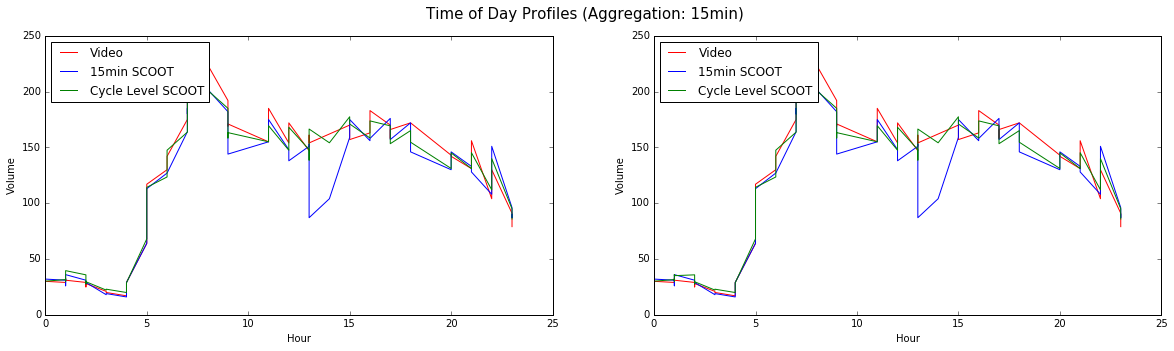

Sum of Absolute Error:
                              Lin hyd Exp   Linear  Quadratic  Lin hyd Quad
Detector        Source                                                     
2-lane detector disaggregate      3001.44  3181.24    2972.34       2995.43
                aggregate         1445.44   563.53     577.83        589.25





In [18]:
for i in range(len(locations)):
    RSS = []
    sdet = [x.strip('\'') for x in sdetectors[i]]
    tcl = centrelines[i]
    dir_bin = dir_bins[i]
    offset = offsets[i]
    iterables = []
    
    print(locations[i])

    # Time Filter 
    s_d = scoot_disagg[(scoot_disagg['seconds']>=start_time_sec) & (scoot_disagg['seconds']+scoot_disagg['CycleTime']<=end_time_sec)].copy()
    s_d = s_d[s_d['detector'].isin([x.strip('\'') for x in sdet])]
    
    r = video[(video['seconds']>=start_time_sec-offset) & (video['seconds']<=end_time_sec-offset) & (video['centreline_id']==tcl) & (video['dir_bin']==dir_bin)].copy()
    r['bin'] = r['seconds']//bin_sec
    
    s_a = scoot_agg[(scoot_agg['seconds']>=start_time_sec) & (scoot_agg['seconds']+900<=end_time_sec)].copy()
    s_a = s_a[s_a['detector'].isin([x.strip('\'') for x in sdet])]
    
    # Aggregate lanes to individual detectors
    r = aggregate_lanes(r, aggregation[i])
    
    # Offset video counts
    r['seconds']=r['seconds']+offset

    # Reset Index
    s_d.reset_index(inplace=True, drop=True)
    r.reset_index(inplace=True, drop=True)
    s_a.reset_index(inplace=True, drop=True)
    
    fig,(ax) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # disaggregate vs video
    fig_a,(ax_a) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # aggregate vs video
    fig_tod, (ax_tod) = plt.subplots(1,len(sdet)+1,figsize=(20,5)) # time of day plots
    
    fig.suptitle('Cycle Level SCOOT vs. Video (Aggregation: SCOOT CYCLE)', fontsize=15)
    fig_a.suptitle('15min SCOOT vs. Video (Aggregation: 15min)', fontsize=15)
    fig_tod.suptitle('Time of Day Profiles (Aggregation: 15min)', fontsize=15)
    
    # Plot Individual Detectors
    for det in range(len(sdet)):
        # Disaggregate vs. Video
        s0_d = s_d[s_d['detector'] == sdet[det]].copy()
        
        if len(s0_d[s0_d['Volume'] != 0]) < 0.5*len(s0_d):
            print('Too Few Valid counts')
            continue
        
        # Get the timestamps of each bin
        min_bins_start = list(s0_d['seconds'])
        min_bins_start.append(s0_d['seconds'].values[-1]+s0_d['CycleTime'].values[-1])
        
        # Interpolate the missing values
        s1_d = fill_in_linear(list(s0_d['Volume']))
        # Aggregate video counts to scoot cycle level
        v = aggregate_data(min_bins_start, r, 'detector'+str(det))

        # Plot
        ax[det].scatter(s1_d, v, label=None)
        add_y_eq_x(ax[det])
        ax[det].set_title(str(det_lane[sdet[det]]) + '-lane detector')
        ax[det].set_ylabel('Video Counts')
        ax[det].set_xlabel('SCOOT Counts')
        
        # Mark counts that are too different (outliers)
        s2_d = [ax[det].scatter(a,b, color = 'r', label=None) for a,b in zip(s1_d, v) if (a>=3*b or b>=3*a)]

        # OPTION 1: LINEAR HYBRID WITH EXP
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_exp = my_curve_fit(ax[det], s1_d, v, func_lin, func2=func_exp, step=20, color='red', fitname='Hybrid Exp Fit', p02=[9,0.0024])
        else:
            RSS_hybrid_exp = None
            
        # OPTION 2: LINEAR
        RSS_linear = my_curve_fit(ax[det], s1_d, v, func_lin, color='magenta', fitname='Linear Fit')
        
        # OPTION 3: QUADRATIC
        RSS_quad = my_curve_fit(ax[det], s1_d, v, func_quad, color='cyan', fitname='Quadratic Fit')
        
        # OPTION 4: LINEAR HYBRID WITH QUADRATIC
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_quad = my_curve_fit(ax[det], s1_d, v, func_lin, func2=func_quad, step=20, color='green', fitname='Hybrid Quad Fit')
        else:
            RSS_hybrid_quad = None
            
        RSS.append([RSS_hybrid_exp, RSS_linear, RSS_quad, RSS_hybrid_quad])
        
        ax[det].legend(loc=4)
        
        # 15min Aggregate vs. Video
        s0_a = s_a[s_a['detector'] == sdet[det]].copy()
        s0_a['bin'] = s0_a['seconds']//bin_sec
        
        v0_a = aggregate_data(min_bins_start_15, r, 'detector'+str(det))
        v0_a = pd.DataFrame({'bin':bins, 'v_v':v0_a})
        # Plot time bins with count
        vol = pd.merge(s0_a, v0_a, on='bin', how='inner', copy=False)
        vol = vol[vol['Volume']!=0]
        
        # Plot
        ax_a[det].scatter(vol['Volume'], vol['v_v'], label=None)
        add_y_eq_x(ax_a[det])
        ax_a[det].set_title(str(det_lane[sdet[det]]) + '-lane detector')
        ax_a[det].set_ylabel('Video Counts')
        ax_a[det].set_xlabel('SCOOT Counts')
        
        # OPTION 1: LINEAR HYBRID WITH EXP
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_exp = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, func2=func_exp, step=20, color='red', fitname='Hybrid Exp Fit', p02=[9,0.0024])
        else:
            RSS_hybrid_exp = None
        # OPTION 2: LINEAR
        RSS_linear = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, color='magenta', fitname='Linear Fit')
        
        # OPTION 3: QUADRATIC
        RSS_quad = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_quad, color='cyan', fitname='Quadratic Fit')
        
        # OPTION 4: LINEAR HYBRID WITH QUADRATIC
        if det_lane[sdet[det]] != 1:
            RSS_hybrid_quad = my_curve_fit(ax_a[det], list(vol['Volume']), list(vol['v_v']), func_lin, func2=func_quad, step=20, color='green', fitname='Hybrid Quad Fit')
        else:
            RSS_hybrid_quad = None
        
        RSS.append([RSS_hybrid_exp, RSS_linear, RSS_quad, RSS_hybrid_quad])
        ax_a[det].legend(loc=4)
        
        # Aggregate disaggregate data to 15min
        s0_d['Volume'] = s1_d
        s_d_a = aggregate_data(min_bins_start_15, s0_d, 'Volume')
        s_d_a = pd.DataFrame({'bin':bins, 's_d_a':s_d_a})
        vol = pd.merge(vol, s_d_a, on='bin', how='inner')
        
        # Plot
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['v_v'], label = 'Video', color = 'r')
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['Volume'], label = '15min SCOOT', color = 'b')
        ax_tod[det].plot([x//4 for x in vol['bin']], vol['s_d_a'], label = 'Cycle Level SCOOT', color = 'g')
        ax_tod[det].set_ylabel('Volume')
        ax_tod[det].set_xlabel('Hour')
        ax_tod[det].legend(loc=2)
        
        iterables.append(str(det_lane[sdet[det]]) + '-lane detector')
    det = det + 1
    
    # Plot Total
    s_d = s_d.groupby(['seconds'], as_index=False).sum()
    min_bins_start = list(s_d['seconds'])
    min_bins_start.append(s_d['seconds'].values[-1]+s_d['CycleTime'].values[-1])
    v = aggregate_data(min_bins_start, r, 'Volume')
    
    ax[det].scatter(s_d['Volume'],v,label='Total')
    ax[det].set_ylabel('Video Counts')
    ax[det].set_xlabel('SCOOT Counts')
    ax[det].legend(loc=4)
    add_y_eq_x(ax[det])
    ax[det].set_title('Total')

    s_a = s_a[s_a['Volume']!=0]
    s_a = s_a.groupby(['seconds'], as_index=False).filter(lambda x: len(x) == len(sdet))
    s_a = s_a.groupby(['seconds'], as_index=False).sum()
    s_a['bin'] = s_a['seconds']//bin_sec
    v_a = aggregate_data(min_bins_start_15, r, 'Volume')
    v_a = pd.DataFrame({'bin':bins, 'v_v':v_a})
    vol = pd.merge(s_a, v_a, on='bin', how='inner')
    vol = vol[vol['Volume']!=0]
    ax_a[det].scatter(vol['Volume'], vol['v_v'], label = 'Total')
    ax_a[det].set_ylabel('Video Counts')
    ax_a[det].set_xlabel('SCOOT Counts')
    ax_a[det].legend(loc=4)
    add_y_eq_x(ax_a[det])
    ax_a[det].set_title('total')
    
    s_d_a = aggregate_data(min_bins_start_15, s_d, 'Volume')
    s_d_a = pd.DataFrame({'bin':bins, 's_d_a':s_d_a})
    vol = pd.merge(vol, s_d_a, on='bin', how='inner')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['v_v'], label = 'Video', color = 'r')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['Volume'], label = '15min SCOOT', color = 'b')
    ax_tod[det].plot([x//4 for x in vol['bin']], vol['s_d_a'], label = 'Cycle Level SCOOT', color = 'g')
    ax_tod[det].set_ylabel('Volume')
    ax_tod[det].set_xlabel('Hour')
    ax_tod[det].legend(loc=2)
    
    plt.show()
    iterables = [iterables,['disaggregate','aggregate']]
    index = pd.MultiIndex.from_product(iterables, names=['Detector','Source'])
    print('Sum of Absolute Error:')
    print(pd.DataFrame(RSS, index=index, columns=['Lin hyd Exp','Linear','Quadratic','Lin hyd Quad']).round(2))
    print('\n\n')